# Sprint9 ニューラルネットワーク

In [16]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [17]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [18]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape

(60000, 784)

## 画像データの可視化
---
画像データを可視化します。<code>plt.imshow</code>に渡します。   
《サンプルコード》

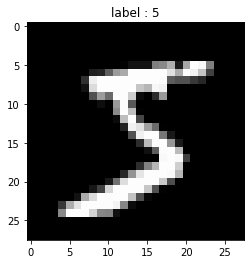

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()


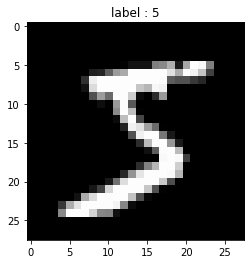

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [20]:
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

In [21]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

print(X_train.shape)
print(X_test.shape)

1.0
0.0
(60000, 784)
(10000, 784)


## 前処理

画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。  
《サンプルコード》

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_test_one_hot.shape) # (60000, 10)
print(y_test_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64
(10000, 10)
float64


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には*one-hot表現*に変換します。scikit-learnの<code>OneHotEncoder</code>を使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。  
《サンプルコード》

さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。
《サンプルコード》

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train.shape) # (48000, 784)
print(y_val.shape) # (12000, 784)


(48000, 784)
(12000, 784)
(48000,)
(12000,)


## ニューラルネットワークスクラッチ

In [24]:
import numpy as np

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, batch_size, n_features, n_nodes1, n_nodes2, n_output, lr, sigma = 0.01, verbose = True):
        self.verbose = verbose
        
        self.batch_size = batch_size # バッチサイズ
        self.lr = lr # 学習率
        
        self.forward_pramas = {}
        
        # 問題1
        # 重みとバイアスの初期化
        self.paramas = {}  # dictonary型
        self.paramas['W1'] = sigma * np.random.randn(n_features, n_nodes1)
        # W2 : 2層目の重み (n_nodes1, n_nodes2)
        self.paramas['W2'] = sigma * np.random.randn(n_nodes1, n_nodes2)
        # W3 : 3層目の重み (n_nodes2, n_output)
        self.paramas['W3'] = sigma * np.random.randn(n_nodes2, n_output)
        # B1 : 1層目のバイアス (n_nodes1,)
        self.paramas['B1'] = sigma * np.random.randn(n_nodes1)
        # B2 : 2層目のバイアス (n_nodes2,)
        self.paramas['B2'] = sigma * np.random.randn(n_nodes2)
        # B3 : 3層目のバイアス (n_output,)
        self.paramas['B3'] = sigma * np.random.randn(n_output)
        
        # 損失を記録する配列を用意
        self.loss_list = []
        self.val_loss_list = []
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            pass
    
        Z3 = self._forward(X)
        self._backward(X, y)
        
        # 損失関数の値を保持
        loss_ = self._cross_entropy_error(y, Z3)
        self.loss_list.append(loss_)
        
        #### 検証データの損失関数の値を保持
        if X_val is not None:
            val_Z3 = self._forward(X_val)
            val_loss_ = self._cross_entropy_error(y_val, val_Z3)
            self.val_loss_list.append(val_loss_)
        
        
    # 問題5
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量ベクトル
        Returns
        -------
　　　　y_pred：次の形のndarray, shape (batch_size, n_output)
            推定結果（10個の確率の中で、最も高いインデックス＝各ラベル（0〜9））
        """
        y_pred = self._forward(X)
        
        return y_pred.argmax(axis=1)
    
    
    # 問題2
    def _forward(self, X):
        '''
        フォワードプロパゲーションの処理
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            サンプル
        Returns
        -------
　　　　Z3：次の形のndarray, shape (batch_size, n_output)
            推定結果（確率）
        '''
        
        A1 = np.dot(X, self.paramas['W1']) + self.paramas['B1']
        Z1 = self._activation_func(A1, s_type = 'tanh') #活性化関数のデフォルトはsigmoid関数
        A2 = np.dot(Z1, self.paramas['W2']) + self.paramas['B2']
        Z2 = self._activation_func(A2, s_type = 'tanh')
        A3 = np.dot(Z2, self.paramas['W3']) + self.paramas['B3']
        Z3 = self._softmax(A3)

        self.forward_pramas['Z1'] = Z1
        self.forward_pramas['Z2'] = Z2
        self.forward_pramas['Z3'] = Z3
        self.forward_pramas['A1'] = A1
        self.forward_pramas['A2'] = A2
        self.forward_pramas['A3'] = A3
        
        return Z3
    
    
    # 問題4
    def _backward(self, X, y):
        '''
        バックプロパゲーションの処理
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベル（One-hot表現）
        Returns
        -------

        '''
        
        W2, W3 = self.paramas['W2'], self.paramas['W3']
        Z1, Z2, Z3 = self.forward_pramas['Z1'], self.forward_pramas['Z2'], self.forward_pramas['Z3']
        A1, A2 = self.forward_pramas['A1'], self.forward_pramas['A2']
        
        # 3rd layer
        dA3 = (Z3 - y)/self.batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = np.dot(Z2.T, dA3)
        dZ2 = np.dot(dA3, W3.T)
        
        # 2nd layer
        dA2 = dZ2*(1 - np.tanh(A2)**2) # ハイボリックタンジェント
#         dA2 = dZ2*(1-self._activation_func(A2))*self._activation_func(A2)
        dB2 = np.sum(dA2, axis=0)
        dW2 = np.dot(Z1.T, dA2)
        dZ1 = np.dot(dA2, W2.T)
        
        # 1st Lyaer
        dA1 = dZ1*(1 - np.tanh(A1)**2) # ハイボリックタンジェント
#         dA1 = dZ1*(1-self._activation_func(A1))*self._activation_func(A1)
        dB1 = np.sum(dA1, axis=0)
        dW1 = np.dot(X.T, dA1)
        
        # 重みとバイアスの更新
        self.paramas['W1'] -= self.lr * dW1
        self.paramas['W2'] -= self.lr * dW2
        self.paramas['W3'] -= self.lr * dW3
        self.paramas['B1'] -= self.lr * dB1
        self.paramas['B2'] -= self.lr * dB2
        self.paramas['B3'] -= self.lr * dB3

        
    def _activation_func(self, A, s_type = 'sigmoid'):
        '''
        活性化関数：デフォルトはシグモイド関数
            シグモイド関数とハイパーボリックタンジェント関数
        '''
        
        if s_type == 'sigmoid':
            return 1 / ( 1 + np.exp(-A) )
        else: # Hyperbolic tangent
            return np.tanh(A)
        
    
    def _softmax(self, X):
        '''
        ソフトマックス関数
        '''

        X = X.T
        y = np.exp(X) / np.sum(np.exp(X), axis=0)
        
        return y.T
    
    # 問題3
    def _cross_entropy_error(self, y, Z3):
        '''
        交差エントロピー誤差の計算
        
        '''
        DELTA = 1e-7
        return -np.sum(y * np.log(Z3 + DELTA))/self.batch_size
        

## ミニバッチ処理
---
これまでの機械学習スクラッチでは、すべてのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する*確率的勾配降下法*が一般的です。分割した際のひとかたまりを*ミニバッチ*、そのサンプル数を*バッチサイズ*と呼びます。

今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回*イテレーション（iteration）*すると呼びます。訓練データを一度すべて見ると1回の*エポック（epoch）*が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [25]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


In [26]:
get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる

for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
#     print(mini_X_train.shape)
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0

## 【問題1】重みの初期値を決めるコードの作成
---
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値はさまざまな方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

《サンプルコード》

In [27]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

## 【問題2】フォワードプロパゲーションの実装
---
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

## 【問題3】交差エントロピー誤差の実装
---
目的関数（損失関数）を作成します。

多クラス分類の目的関数である交差エントロピー誤差$L$は次の数式です。
$$
L=−\frac{1}n_b\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk}log(z_{3_jk})
$$
$y_{ij}$: j 番目のサンプルの$k$番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）

$z3_{ij}$: j 番目のサンプルの$k$番目のクラスの確率（スカラー）

$n_b$: バッチサイズ、batch_size

$n_c$: クラスの数、n_output（今回のMNISTでは10）

サンプル1つあたりの誤差が求まります。

実数におけるlog(x)の定義域は<code>$0 < x$</code>です。したがって、logの中身がとても小さい値になってしまったときエラーを起こします。そこでlogの中に1e-7を足すことでエラーを回避できます。

こういった処理はlogに限らず、さまざまな場所で出てくることがあります。

### 推定

## 【問題6】学習と推定
---
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [28]:
# One-hotエンコーダー
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])

get_mini_batch = GetMiniBatch(X_train, y_train_one_hot, batch_size=20)
val_get_mini_batch = GetMiniBatch(X_val, y_val_one_hot, batch_size=5)
# print(len(val_get_mini_batch)) # 2400

batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
lr = 0.05 # 学習率

# インスタンス生成
NN = ScratchSimpleNeuralNetrowkClassifier(batch_size, n_features, n_nodes1, n_nodes2, n_output, lr)
# 2400回分ミニバッチを実行する
for i in range(len(get_mini_batch)):

    mini_X_train, mini_y_train = get_mini_batch[i]
    mini_X_val, mini_y_val = val_get_mini_batch[i]
    
    NN.fit(mini_X_train, mini_y_train, mini_X_val, mini_y_val)
    


In [29]:
y_pred = NN.predict(X_val)
y_val_argmax = y_val_one_hot.argmax(axis=1)
accuracy = np.sum(y_pred == y_val_argmax) / float(X_val.shape[0])

print("accuracy :", accuracy)

accuracy : 0.91225


## 【問題7】学習曲線のプロット
---
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

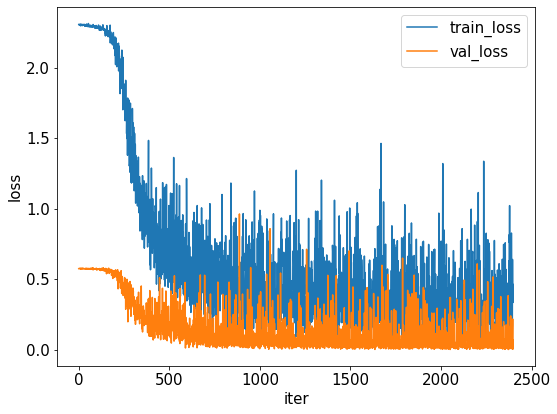

In [30]:

# 学習曲線をプロット
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(range(len(get_mini_batch)), NN.loss_list, label = 'train_loss')
plt.plot(range(len(val_get_mini_batch)), NN.val_loss_list, label = 'val_loss')

plt.legend()
plt.tight_layout()
plt.show()